In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

In [156]:
hs=pd.read_csv('train.csv')
# hs1=pd.read_csv('train.csv')

In [157]:
hs.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [159]:
hs['MiscFeature'].fillna('None',inplace=True)

In [160]:
hs.isnull().sum()[hs.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
dtype: int64

In [161]:
# Alley rating gravel being 1 paved being 2
hs['Alley'].replace('Grvl',2,inplace=True)
hs['Alley'].replace('Pave',1,inplace=True)
hs['Alley'].fillna(0,inplace=True)

In [162]:
# Street rating gravel being 1 paved being 2
hs['Street'].replace('Grvl',2,inplace=True)
hs['Street'].replace('Pave',1,inplace=True)
hs['Street'].fillna(0,inplace=True)

In [163]:
#  Assigning rating to the quality
hs['PoolQC'].replace('Ex',5,inplace=True)
hs['PoolQC'].replace('Gd',4,inplace=True)
hs['PoolQC'].replace('TA',3,inplace=True)
hs['PoolQC'].replace('Fa',2,inplace=True)

In [164]:
hs['PoolQC'].fillna(0,inplace=True)

In [165]:
hs['PoolQC'].unique()

array([0., 5., 2., 4.])

In [166]:
# hs[['GarageType'
# ,'GarageYrBlt'
# ,'GarageFinish'
# ,'GarageCars'
# ,'GarageArea'
# ,'GarageQual'
# ,'GarageCond']]

In [167]:
#  Assigning rating to the Garagge Type
hs['GarageType'].replace('2Types',5,inplace=True)
hs['GarageType'].replace('Detchd',4,inplace=True)
hs['GarageType'].replace('Attchd',3,inplace=True)
hs['GarageType'].replace('Basment',2,inplace=True)
hs['GarageType'].replace('BuiltIn',1,inplace=True)
hs['GarageType'].replace('CarPort',1,inplace=True)
hs['GarageType'].fillna(0,inplace=True)

In [168]:
hs['GarageType'].unique()

array([3., 4., 1., 0., 2., 5.])

In [169]:
# 'GarageFinish'
hs['GarageFinish'].replace('Fin',3,inplace=True)
hs['GarageFinish'].replace('RFn',2,inplace=True)
hs['GarageFinish'].replace('Unf',1,inplace=True)
hs['GarageFinish'].fillna(0,inplace=True)

In [170]:
hs['GarageFinish'].unique()

array([2., 1., 3., 0.])

In [171]:
# Imputing the rated year with mean rating
# import scipy.stats as stats
# stats.mode(hs['GarageYrBlt'])
hs['GarageYrBlt'].fillna(hs['GarageYrBlt'].mean(),inplace=True)

In [172]:
# Rating based on year built, latest being 5 and oldest being 0
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0, 5), copy=True)
hs['GarageYrBlt']=mms.fit_transform(hs[['GarageYrBlt']])

In [173]:
hs['GarageYrBlt'].nunique()

98

In [174]:
# Rating based on GarageArea, highest being 5 and least being 0
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0, 5), copy=True)
hs['GarageArea']=mms.fit_transform(hs[['GarageArea']])

In [175]:
hs['GarageArea'].nunique()

441

In [176]:
# Rating based on GarageQuality best being 5 least being 0
hs['GarageQual'].replace('Ex',5,inplace=True)
hs['GarageQual'].replace('Gd',4,inplace=True)
hs['GarageQual'].replace('TA',3,inplace=True)
hs['GarageQual'].replace('Fa',2,inplace=True)
hs['GarageQual'].replace('Po',1,inplace=True)
hs['GarageQual'].fillna(0,inplace=True)

In [177]:
# Rating based on GarageCondition best being 5 least being 0
hs['GarageCond'].replace('Ex',5,inplace=True)
hs['GarageCond'].replace('Gd',4,inplace=True)
hs['GarageCond'].replace('TA',3,inplace=True)
hs['GarageCond'].replace('Fa',2,inplace=True)
hs['GarageCond'].replace('Po',1,inplace=True)
hs['GarageCond'].fillna(0,inplace=True)

In [178]:
# FireplaceQu
# Rating based on FireplaceQu best being 5 least being 0
hs['FireplaceQu'].replace('Ex',5,inplace=True)
hs['FireplaceQu'].replace('Gd',4,inplace=True)
hs['FireplaceQu'].replace('TA',3,inplace=True)
hs['FireplaceQu'].replace('Fa',2,inplace=True)
hs['FireplaceQu'].replace('Po',1,inplace=True)
hs['FireplaceQu'].fillna(0,inplace=True)

In [179]:
hs[['MiscFeature','MiscVal']]
# Since MiscFeature and MiscVal provides the information about the same feature we tend to drop MiscFeature.
hs=hs.drop(['MiscFeature'],axis=1)

In [180]:
# Fence
hs['Fence'].replace('GdPrv',4,inplace=True)
hs['Fence'].replace('MnPrv',3,inplace=True)
hs['Fence'].replace('GdWo',2,inplace=True)
hs['Fence'].replace('MnWw',1,inplace=True)

hs['Fence'].fillna(0,inplace=True)

In [181]:
# LotFrontage is the place left after the flooring is done. 
#  Here we assume that houses doesnt have lot area left
hs['LotFrontage'].fillna(0,inplace=True)

In [182]:
hs[hs['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,0.0,7851,1,0.0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,3.0,1.0,4.636364,3.0,2,1.551481,3.0,3.0,Y,288,48,0,0,0,0,0.0,0.0,0,5,2010,WD,Normal,216500
529,530,20,RL,0.0,32668,1,0.0,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,3.0,3.0,3.409091,2.0,2,1.706629,3.0,3.0,Y,0,0,200,0,0,0,0.0,0.0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,1,0.0,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,0.0,3.0,4.863636,2.0,2,1.981664,3.0,3.0,Y,0,0,0,0,0,0,0.0,0.0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,1,0.0,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,0.0,3.0,4.681818,2.0,2,1.956982,3.0,3.0,Y,0,41,0,0,0,0,0.0,0.0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,1,0.0,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,0.0,3.0,4.863636,3.0,2,1.692525,3.0,3.0,Y,0,120,0,0,0,0,0.0,0.0,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,1,1.0,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,0.0,3.0,4.863636,3.0,2,2.006347,3.0,3.0,Y,0,116,0,0,0,0,0.0,0.0,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,1,0.0,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,4.0,3.0,4.818182,3.0,3,2.997179,3.0,3.0,Y,216,229,0,0,0,0,0.0,0.0,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,1,0.0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,4.0,3.0,4.636364,2.0,2,2.034556,3.0,3.0,Y,0,211,0,0,0,0,0.0,0.0,0,3,2008,WD,Normal,237000


In [183]:
#imputing the nulls with None which is the mode of  Masonry Veneer Type
hs['MasVnrType'].fillna('None',inplace=True)

In [184]:
# Finding the mean of Masonry Veneer Area with respect to Masonry Veneer Type
hs['MasVnrArea'].groupby(hs['MasVnrType']).mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

In [185]:
# Imputing the nulls with the mean of Masonry Veneer Type = None
hs['MasVnrArea'].fillna(1.094907,inplace=True)

In [186]:
hs['BsmtFinType1'].unique()
# BsmtCond        37
# BsmtExposure    38
# BsmtFinType1    37
# BsmtFinType2    38
# Electrical       1

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [187]:
# BsmtQual
# Rating based on BsmtQual best being 5 least being 0
hs['BsmtQual'].replace('Ex',5,inplace=True)
hs['BsmtQual'].replace('Gd',4,inplace=True)
hs['BsmtQual'].replace('TA',3,inplace=True)
hs['BsmtQual'].replace('Fa',2,inplace=True)
hs['BsmtQual'].replace('Po',1,inplace=True)
hs['BsmtQual'].fillna(0,inplace=True)

In [188]:
# BsmtCond
# Rating based on BsmtCond best being 5 least being 0
hs['BsmtCond'].replace('Ex',5,inplace=True)
hs['BsmtCond'].replace('Gd',4,inplace=True)
hs['BsmtCond'].replace('TA',3,inplace=True)
hs['BsmtCond'].replace('Fa',2,inplace=True)
hs['BsmtCond'].replace('Po',1,inplace=True)
hs['BsmtCond'].fillna(0,inplace=True)

In [189]:
# BsmtExposure
# Rating based on BsmtExposure best being 4 least being 0
hs['BsmtExposure'].replace('Gd',4,inplace=True)
hs['BsmtExposure'].replace('Av',3,inplace=True)
hs['BsmtExposure'].replace('Mn',2,inplace=True)
hs['BsmtExposure'].replace('No',1,inplace=True)
hs['BsmtExposure'].fillna(0,inplace=True)

In [190]:
# BsmtFinType1
# Rating based on BsmtFinType1 best being 5 least being 0
hs['BsmtFinType1'].replace('GLQ',6,inplace=True)
hs['BsmtFinType1'].replace('ALQ',5,inplace=True)
hs['BsmtFinType1'].replace('BLQ',4,inplace=True)
hs['BsmtFinType1'].replace('Rec',3,inplace=True)
hs['BsmtFinType1'].replace('LwQ',2,inplace=True)
hs['BsmtFinType1'].replace('Unf',1,inplace=True)
hs['BsmtFinType1'].fillna(0,inplace=True)

In [191]:
# BsmtFinType2
# Rating based on BsmtFinType2 best being 5 least being 0
hs['BsmtFinType2'].replace('GLQ',6,inplace=True)
hs['BsmtFinType2'].replace('ALQ',5,inplace=True)
hs['BsmtFinType2'].replace('BLQ',4,inplace=True)
hs['BsmtFinType2'].replace('Rec',3,inplace=True)
hs['BsmtFinType2'].replace('LwQ',2,inplace=True)
hs['BsmtFinType2'].replace('Unf',1,inplace=True)
hs['BsmtFinType2'].fillna(0,inplace=True)

In [192]:
hs[hs['Electrical'].isnull()]
b=hs['Electrical'].mode()
hs['Electrical'].fillna(b[0],inplace=True)

In [193]:
# hs.KitchenQual.unique()
# 'Gd', 'TA', 'Ex', 'Fa'
hs['KitchenQual'].replace('Ex',4,inplace=True)
hs['KitchenQual'].replace('Gd',3,inplace=True)
hs['KitchenQual'].replace('TA',2,inplace=True)
hs['KitchenQual'].replace('Fa',1,inplace=True)

In [194]:
# Creating a new feature Kitchen_index based on KitchenQual and KitchenAbvGr
hs['Kitchen_index']=hs['KitchenQual']*hs['KitchenAbvGr']

In [195]:
# Droping the old columns
hs=hs.drop(['KitchenQual','KitchenAbvGr'],axis=1)

In [196]:
# Creating a new feature Kitchen_index based on KitchenQual and KitchenAbvGr
hs['FirePlace_index']=hs['Fireplaces']*hs['FireplaceQu']

In [197]:
# Droping the old columns
hs=hs.drop(['Fireplaces','FireplaceQu'],axis=1)

In [198]:
hs['Garage_index']=hs['GarageType']+hs['GarageYrBlt']+hs['GarageFinish']+hs['GarageCars']+hs['GarageArea']+hs['GarageQual']+hs['GarageCond']

In [199]:
hs=hs.drop(['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea', 'GarageQual',
       'GarageCond'],axis=1)

In [200]:
hs['Pool_index']=hs['PoolArea']*hs['PoolQC']

In [201]:
hs=hs.drop(['PoolArea', 'PoolQC'],axis=1)

In [202]:
'ExterQual'
# hs['ExterQual'].unique()
hs['ExterQual'].replace('Ex',4,inplace=True)
hs['ExterQual'].replace('Gd',3,inplace=True)
hs['ExterQual'].replace('TA',2,inplace=True)
hs['ExterQual'].replace('Fa',1,inplace=True)

In [203]:
 'ExterCond'
hs['ExterCond'].unique()
hs['ExterCond'].replace('Ex',5,inplace=True)
hs['ExterCond'].replace('Gd',4,inplace=True)
hs['ExterCond'].replace('TA',3,inplace=True)
hs['ExterCond'].replace('Fa',2,inplace=True)
hs['ExterCond'].replace('Po',1,inplace=True)

In [204]:
'HeatingQC'
hs['HeatingQC'].unique()
hs['HeatingQC'].replace('Ex',5,inplace=True)
hs['HeatingQC'].replace('Gd',4,inplace=True)
hs['HeatingQC'].replace('TA',3,inplace=True)
hs['HeatingQC'].replace('Fa',2,inplace=True)
hs['HeatingQC'].replace('Po',1,inplace=True)

In [205]:
hs['BsmtFinType2'].unique()

array([1., 4., 0., 5., 3., 2., 6.])

In [210]:
# Columns fo rmin max scalar in basement
hs['Bsmt_index']=((hs['BsmtFinSF1']-hs['BsmtUnfSF']) * hs['BsmtFinType1'])+((hs['BsmtFinSF2'] -hs['BsmtUnfSF'])* hs['BsmtFinType2'])

In [211]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0, 5), copy=True)
hs['Bsmt_index']=mms.fit_transform(hs[['Bsmt_index']])

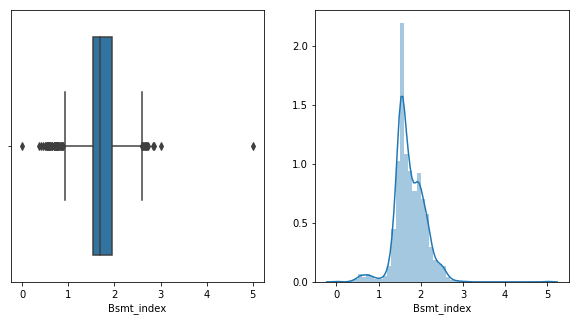

In [212]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(hs['Bsmt_index'],ax=ax[0])
sns.distplot(hs['Bsmt_index'],ax=ax[1], norm_hist=True)
plt.show()

##### From the above KDE plot we could see that there are some outliers in the data, we gotta check them...!

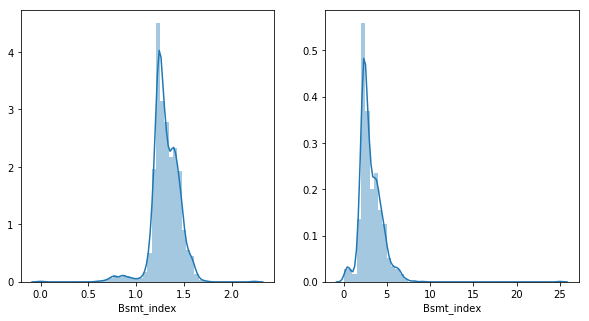

In [213]:
# Checking with the differnt types of transfiormations 
# log results in some infinte values
# square results in increase in the kurtosis which increased the outliers
#  Square root is better comparatively but it dint handle all the outliers
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(np.sqrt(hs['Bsmt_index']),ax=ax[0])
sns.distplot((hs['Bsmt_index'])**2,ax=ax[1], norm_hist=True,)
plt.show()

##### Square root is better comparatively but it dint handle all the outliers, so we decide to remove the outliers.

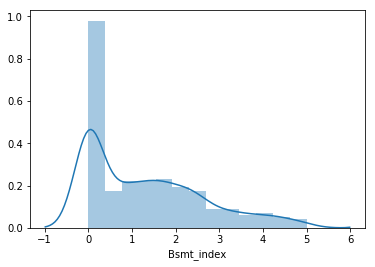

In [150]:
hs=hs.drop(hs[hs['Bsmt_index']>3].index)
hs['Bsmt_index']=mms.fit_transform(hs[['Bsmt_index']])
sns.distplot(hs['Bsmt_index'])=

##### Now we gotta remove t he additional columns since we computed basement index

In [214]:
hs=hs.drop(['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF'], axis=1)

In [220]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
Id                 1460 non-null int64
MSSubClass         1460 non-null int64
MSZoning           1460 non-null object
LotFrontage        1460 non-null float64
LotArea            1460 non-null int64
Street             1460 non-null int64
Alley              1460 non-null float64
LotShape           1460 non-null object
LandContour        1460 non-null object
Utilities          1460 non-null object
LotConfig          1460 non-null object
LandSlope          1460 non-null object
Neighborhood       1460 non-null object
Condition1         1460 non-null object
Condition2         1460 non-null object
BldgType           1460 non-null object
HouseStyle         1460 non-null object
OverallQual        1460 non-null int64
OverallCond        1460 non-null int64
YearBuilt          1460 non-null int64
YearRemodAdd       1460 non-null int64
RoofStyle          1460 non-null object
RoofMatl           

In [223]:
X=hs.select_dtypes(['float64', 'int64'])
X=X.drop('SalePrice',axis=1)
y=hs['SalePrice']

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [225]:
from sklearn.linear_model import LinearRegression

In [230]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
y_predict=lr.predict(X_test)

In [235]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_predict)
print(np.sqrt(mse))
r2=r2_score(y_test,y_predict)
print(r2)

32925.383275411135
0.8343015572318373


In [217]:
catcols=hs.select_dtypes('object').columns
# from sklearn.preprocessing import La
catcols

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')